

# Pixels Distribution



## Import Libraries

In [56]:
!pip install rasterio

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio
import cv2 as cv

## Read Imagery

In [58]:
def read_images(path):
  files_list = os.listdir(path)
  images_list = []
  for file_name in files_list:
    try:
      images_list.append(rasterio.open(path + '/' + file_name))
    except:
      continue

  return images_list

In [59]:
non_forst_path = '/content/non_forst'
non_forst_images_list = read_images(non_forst_path)

forst_path = '/content/forst'
forst_images_list = read_images(forst_path)

## Create Layers

In [60]:
def convert_to_array_and_create_layers(rastrio_images_list):
  '''
  get list of rastrio tif files
  return list of np.arrays wite 4 layers: vv, vh, vv + vh and vv * vh
  '''
  new_images_list = []

  for image in rastrio_images_list:

    row = image.shape[0]
    columns = image.shape[1]
    layers = 4

    new_image = np.zeros((row, columns, layers))

    new_image[:, : ,0] = image.read(1)
    new_image[:, : ,1] = image.read(2)
    new_image[:, : ,2] = image.read(1) + image.read(2)
    new_image[:, : ,3] = image.read(1) * image.read(2)

    new_images_list.append(new_image)

  return new_images_list

In [61]:
non_forst_images_as_array = convert_to_array_and_create_layers(non_forst_images_list)
forst_images_as_array = convert_to_array_and_create_layers(forst_images_list)

## Histogram of all pixels from all images

### Pixels to one-dimensional array without nan values

In [62]:
def flat_and_remove_nan(arr):
  arr_flat = arr.reshape(-1)
  arr_flat_clean = arr_flat[~np.isnan(arr_flat)]
  return arr_flat_clean

def layer_flat_clean_nan_array(list_of_images_as_array):

  '''
  get list of images as array
  return all the pixel ​​of all layers as a one-dimensional array without nan values
  '''

  vv = np.empty(0)
  vh = np.empty(0)
  addition = np.empty(0)
  multiplication = np.empty(0)

  for i in range(len(list_of_images_as_array)):
    vv = np.append(vv, flat_and_remove_nan(list_of_images_as_array[i][:, :, 0]))
    vh = np.append(vh, flat_and_remove_nan(list_of_images_as_array[i][:, :, 1]))
    addition = np.append(addition, flat_and_remove_nan(list_of_images_as_array[i][:, :, 2]))
    multiplication = np.append(multiplication, flat_and_remove_nan(list_of_images_as_array[i][:, :, 3]))

  return vv, vh, addition, multiplication

In [63]:
non_vv, non_vh, non_addition, non_multiplication = layer_flat_clean_nan_array(non_forst_images_as_array)
forst_vv, forst_vh, forst_addition, forst_multiplication = layer_flat_clean_nan_array(forst_images_as_array)

### Histograms

In [64]:
number_of_bins = 200

#### VV

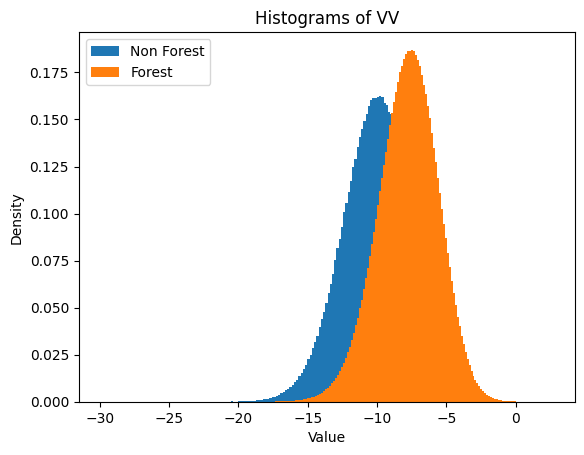

In [65]:
plt.hist(non_vv, label='Non Forest', bins=number_of_bins, density=True)
plt.hist(forst_vv, label='Forest', bins=number_of_bins, density=True)

plt.title('Histograms of VV')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

#### VH

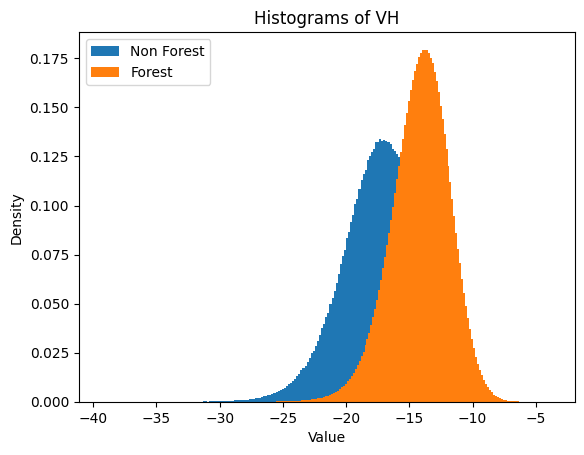

In [66]:
plt.hist(non_vh, label='Non Forest', bins=number_of_bins, density=True)
plt.hist(forst_vh, label='Forest', bins=number_of_bins, density=True)

plt.title('Histograms of VH')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

#### Sum

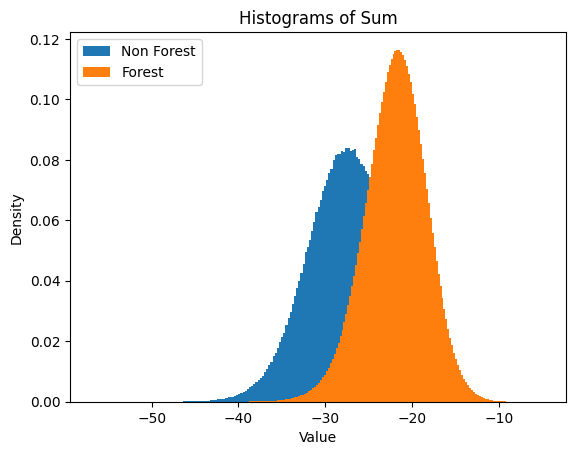

In [69]:
plt.hist(non_addition, label='Non Forest', bins=number_of_bins, density=True)
plt.hist(forst_addition, label='Forest', bins=number_of_bins, density=True)

plt.title('Histograms of Sum')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

#### Multiplication

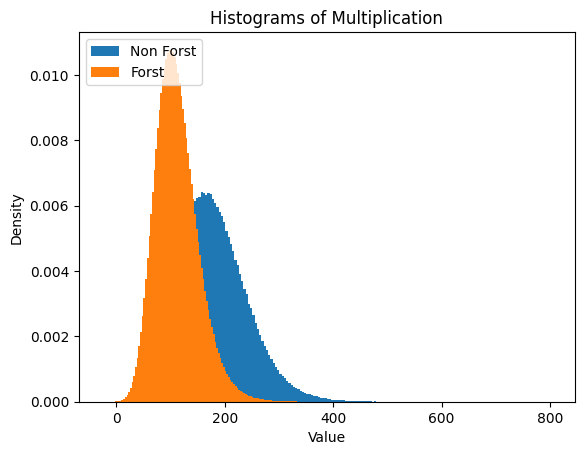

In [68]:
plt.hist(non_multiplication, label='Non Forst', bins=number_of_bins, density=True)
plt.hist(forst_multiplication, label='Forst', bins=number_of_bins, density=True)

plt.title('Histograms of Multiplication')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()